# Exploratory Data Analysis - Terrorism Task 4

## -Siddhant Chaudhary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
data = pd.read_csv('globalt.csv',engine='python')

In [9]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
data.shape

(181691, 135)

<AxesSubplot:>

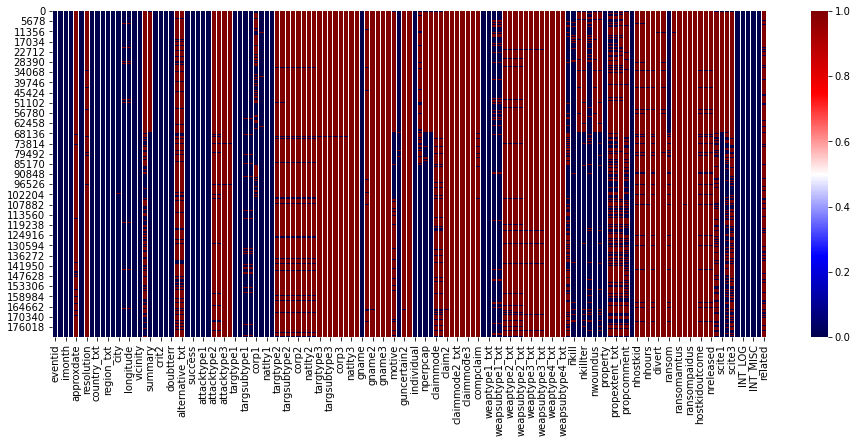

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),cmap='seismic',cbar=True)

In [20]:
data = data[['eventid','iyear', 'imonth', 'country_txt', 'region_txt','natlty1_txt', 'provstate', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound']]

In [21]:
data.rename(columns={'eventid':'Event ID','iyear':'Year','imonth':'Month','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'Attack Type','targtype1_txt':'Target Type','gname':'Group','natlty1_txt': 'Nationality','motive':'Motive','weaptype1_txt':'Weapon Used', 'weapsubtype1_txt': 'Weapon subtype','nkill':'Killed','nwound':'Wounded'},inplace = True)


In [22]:
# filling the null values with a string
data['Weapon subtype']=data['Weapon subtype'].fillna('Unknown') 
data['Nationality'] = data['Nationality'].fillna('No Record')  


<AxesSubplot:>

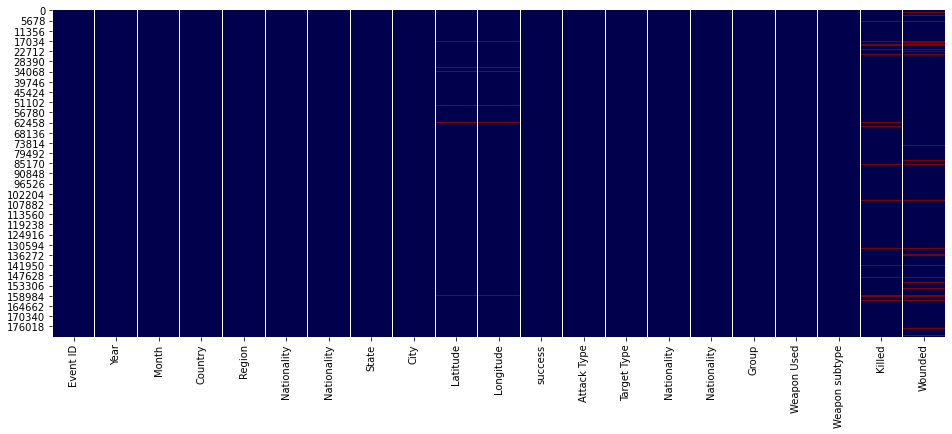

In [23]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),cmap='seismic',cbar=False)

In [31]:
#dropping null values
data.dropna(inplace=True)


In [34]:
 #adding the killed and wounded in casualties
data['Casualties'] = data['Killed'] + data['Wounded']

# Number of attacks

C:\Users\Siddhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


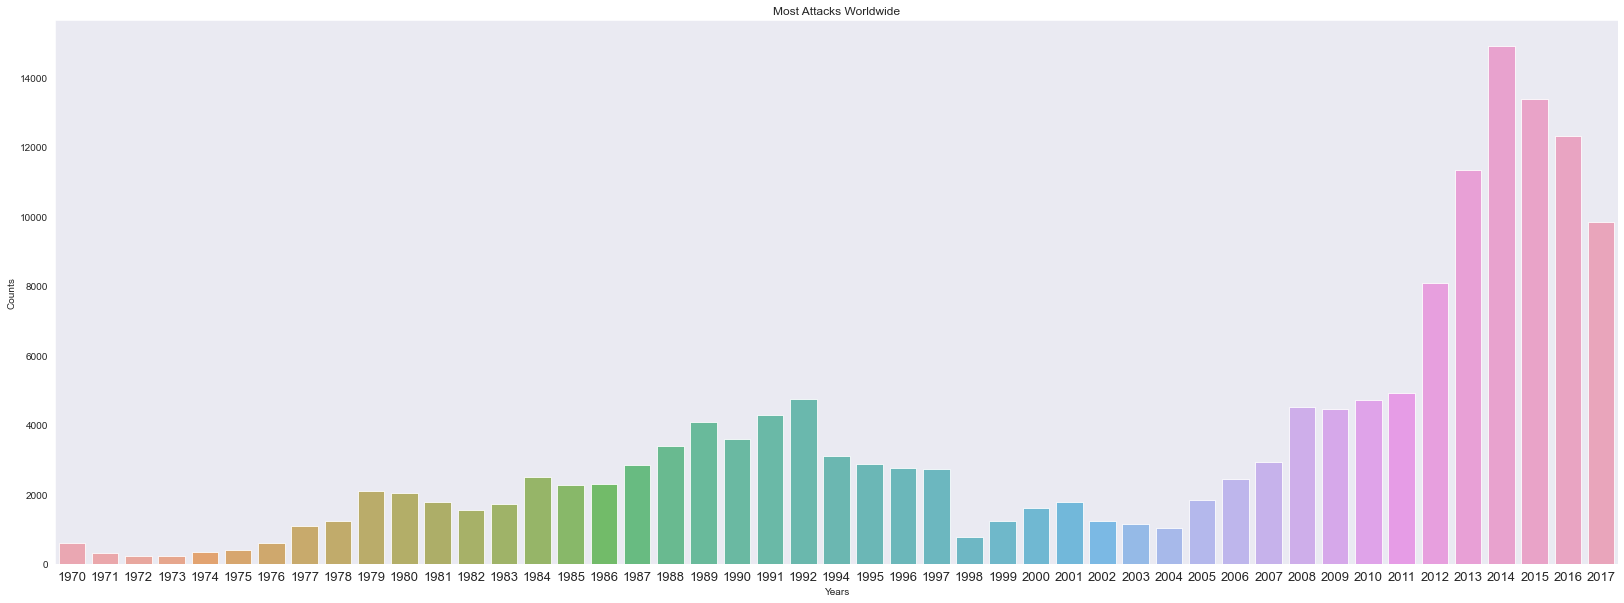

In [41]:
sns.set_style('dark')
ls = data['Year'].value_counts().sort_index()
plt.figure(figsize = (28,10))
Most_att = sns.barplot(ls.index, ls.values,alpha = 0.8)
plt.title('Most Attacks Worldwide')
plt.xlabel('Years')
plt.ylabel('Counts')
Most_att.set_xticklabels(labels = ls.index, fontsize = 13)
plt.show()

# Affected Regions

<AxesSubplot:ylabel='Region'>

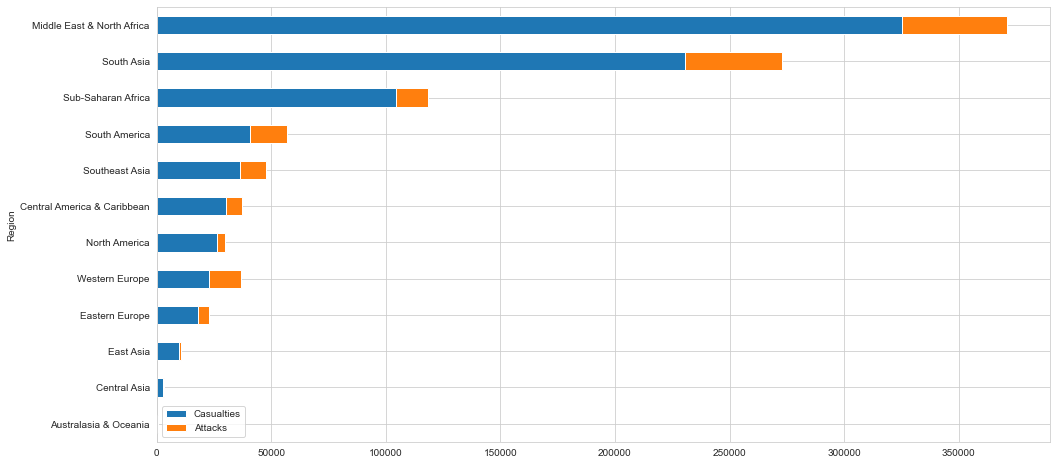

In [40]:
data[data['Region'].isin(data['Region'].value_counts()[:20].index)][['Casualties','Region']].groupby('Region').sum().reset_index().sort_values('Casualties',ascending=True).merge(data[data['Region'].isin(data['Region'].value_counts(ascending = True)[:20].index)]['Region'].value_counts(ascending = False).to_frame().reset_index().rename(columns={'index':'Region','Region':'Attacks'}),on='Region').plot.barh(x='Region',y=['Casualties','Attacks'], figsize =(16,8),stacked=True)

# Types of Attacks used 

C:\Users\Siddhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


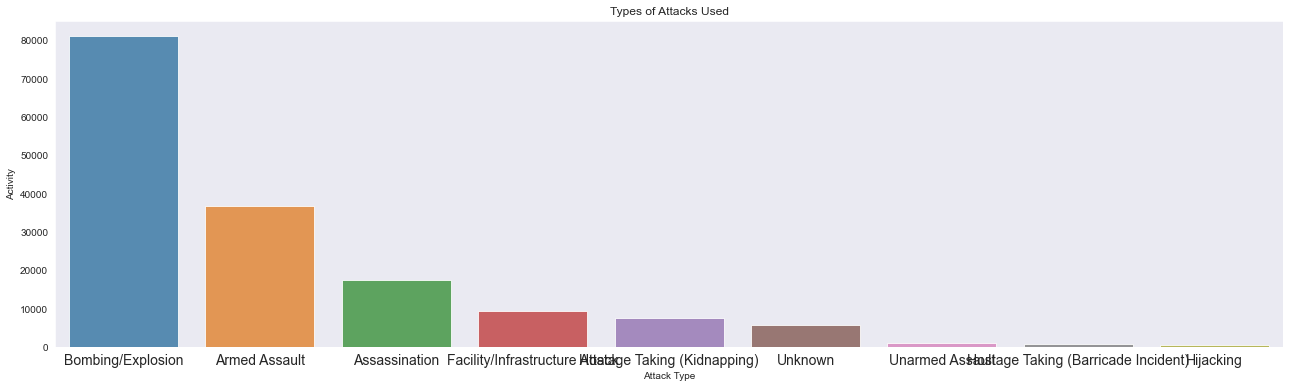

In [50]:
ls = data['Attack Type'].value_counts().sort_values(ascending = False)
plt.figure(figsize=(22,6))
most_att = sns.barplot(ls.index, ls.values, alpha = 0.8)
plt.title("Types of Attacks Used")
plt.xlabel('Attack Type')
plt.ylabel('Activity')
most_att.set_xticklabels(labels = ls.index, rotation = 0,fontsize =14)
plt.show()

# Top 20 affected countries 

Text(0.5, 0, 'Country')

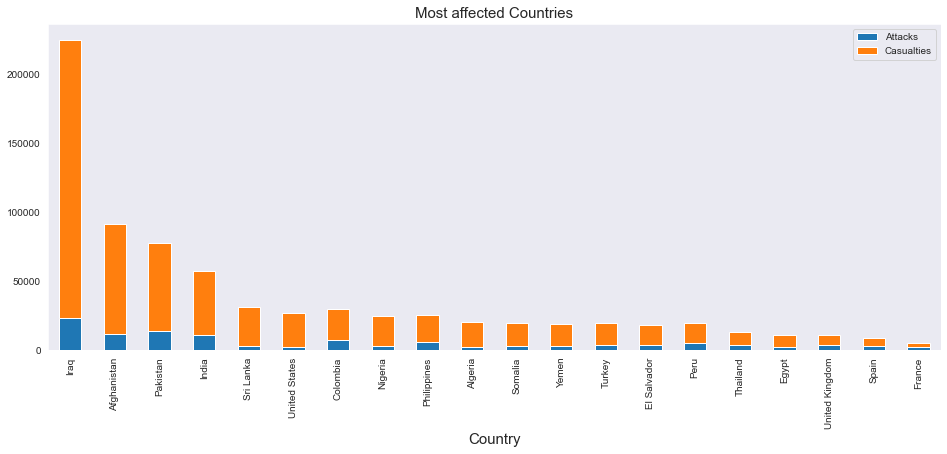

In [48]:

data[data['Country'].isin(data['Country'].value_counts()[:20].index)][['Casualties','Country']].groupby('Country').sum().reset_index().sort_values('Casualties', ascending = False).merge(data[data['Country'].isin(data['Country'].value_counts()[:20].index)]['Country'].value_counts().to_frame().reset_index().rename(columns = {'index':'Country','Country':'Attacks'}),on='Country').plot.bar(x='Country', y=['Attacks','Casualties'],figsize=(16,6),stacked=True)
plt.title('Most affected Countries', fontsize=15)
plt.xlabel('Country', fontsize = 15)

# Active Terrorist Groups 

C:\Users\Siddhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


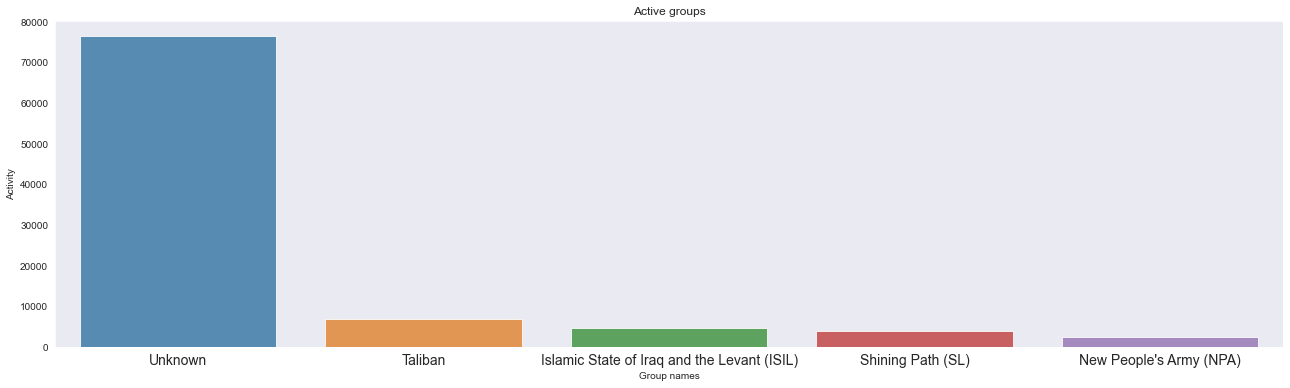

In [52]:
ls = data['Group'].value_counts().sort_values(ascending = False)
ls = ls[:5]
plt.figure(figsize=(22,6))
most_act = sns.barplot(ls.index, ls.values, alpha = 0.8)
plt.title("Active groups")
plt.xlabel('Group names')
plt.ylabel('Activity')
most_act.set_xticklabels(labels = ls.index, rotation = 0,fontsize =14)
plt.show()

# Targets

C:\Users\Siddhant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


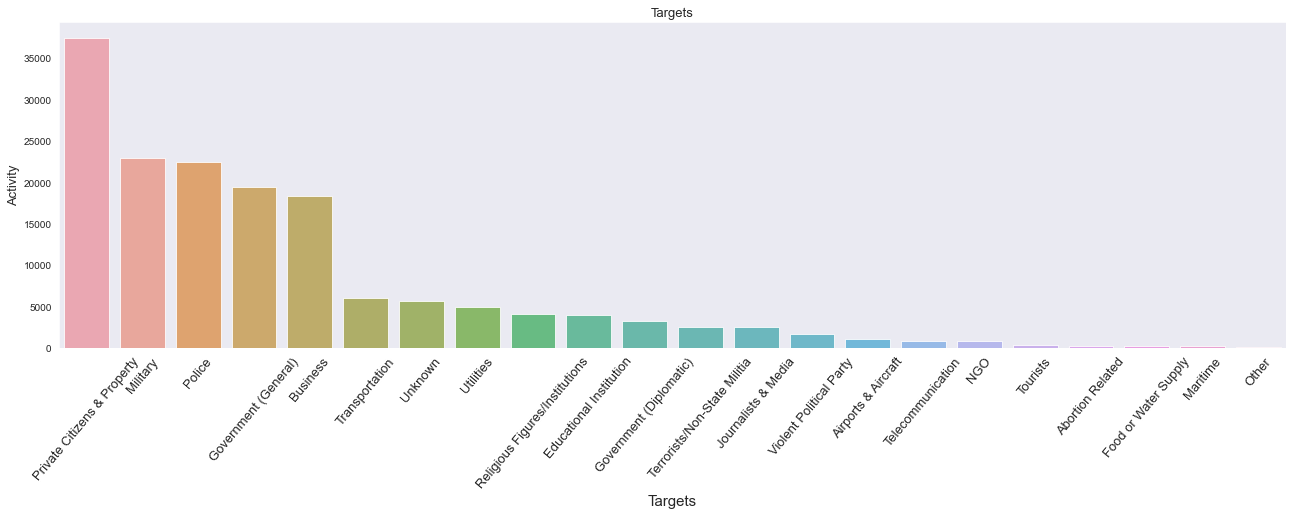

In [45]:
ls = data['Target Type'].value_counts().sort_values(ascending = False)
plt.figure(figsize=(22,6))
most_tar = sns.barplot(ls.index, ls.values, alpha = 0.8)
plt.title("Targets",fontsize = 13)
plt.xlabel('Targets',fontsize = 15)
plt.ylabel('Activity',fontsize = 13)
most_tar.set_xticklabels(labels = ls.index, rotation = 50,fontsize =13)
plt.show()